# 1&2. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
path = '/Users/bazillaimran/Documents/03-2024 Airbnb US Analysis'

In [4]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_with_states.csv'))

# 3. Data Cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'listing_id', 'listing_name', 'host_id', 'host_name',
       'neighborhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'last_12_month_reviews_count', 'city',
       'rental_type', 'price_category', 'listings_per_host',
       'booking_requirement', 'popularity', 'coordinates', 'state'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,...,availability_365,last_12_month_reviews_count,city,rental_type,price_category,listings_per_host,booking_requirement,popularity,coordinates,state
0,0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,...,128,59,San Francisco,Vacation Rental,mid-price,500 or less,less than 1 week,booked half year,"(37.77028, -122.43317)",California
1,1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,...,365,0,San Francisco,Vacation Rental,mid-price,500 or less,over 3 weeks,unbooked,"(37.74474, -122.42089)",California
2,2,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,...,365,0,San Francisco,Vacation Rental,high price,500 or less,1-3 weeks,unbooked,"(37.77564, -122.43642)",California
3,3,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,...,159,34,San Francisco,Vacation Rental,low price,500 or less,less than 1 week,booked half year,"(37.7603, -122.42197)",California
4,4,10537,Elegant & Cozy w/City views. Private room: Purple,36752,Teresa,Bayview,37.71750,-122.39698,Private room,95,...,365,1,San Francisco,Vacation Rental,low price,500 or less,less than 1 week,unbooked,"(37.7175, -122.39698)",California


In [7]:
df.shape

(204454, 25)

In [8]:
# Drop columns in df_ords_prods_combined (not necessary) 
df = df.drop(columns = ['Unnamed: 0'])

### Missing Values

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

listing_id                         0
listing_name                      16
host_id                            0
host_name                          0
neighborhood                       0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
last_12_month_reviews_count        0
city                               0
rental_type                        0
price_category                     0
listings_per_host                  0
booking_requirement                0
popularity                         0
coordinates                        0
state                              0
dtype: int64

### Duplicates check

In [10]:
dups = df.duplicated()

In [11]:
dups.shape # No dups

(204454,)

# 4. Exploring data visually

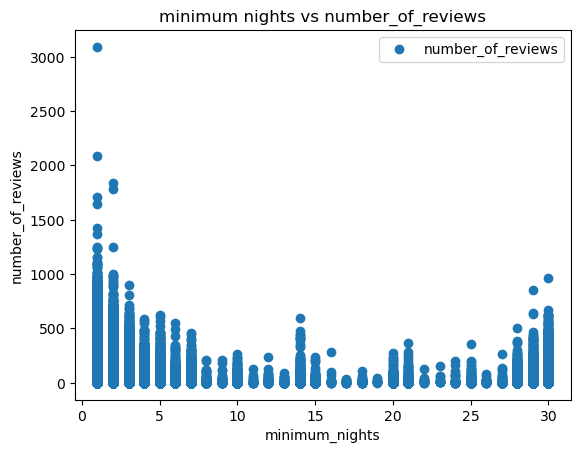

In [12]:
# Hypothesis: As the number of minimum nights increases the monthly reviews for the listing would decrease.
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'minimum_nights', y='reviews_per_month',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('minimum nights vs number_of_reviews')  
plt.xlabel('minimum_nights')  
plt.ylabel('number_of_reviews')  
plt.show()

In [28]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['minimum_nights'].values.reshape(-1,1)
y = df['number_of_reviews'].values.reshape(-1,1)

In [29]:
X

array([[ 2],
       [30],
       [ 9],
       ...,
       [ 1],
       [ 2],
       [ 2]])

In [30]:
y

array([[383],
       [111],
       [ 28],
       ...,
       [  0],
       [  0],
       [  0]])

In [31]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [33]:
regression.fit(X_train, y_train)  # Fit the regression object onto the training set.

LinearRegression()

In [34]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

# 4. Regression Analysis

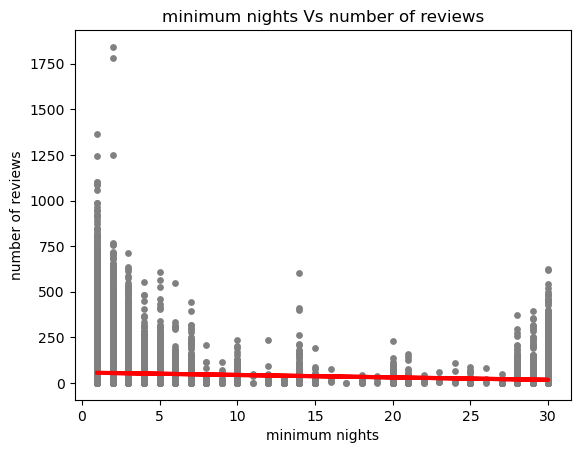

In [35]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('minimum nights Vs number of reviews')
plot_test.xlabel('minimum nights')
plot_test.ylabel('number of reviews')
plot_test.show()

In [36]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [37]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.33429433]]
Mean squared error:  6727.994919302551
R2 score:  0.039711741825040225


Since the mease square error is extremely high (6728) and the R2 score is only a 3.97%, it's safe to say that a regression may not be the best model to represent this data and can't accurately predict the influence of minimum number of nights on the number of reviews a listing recieves.  

In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.56,1.882971
1,0.05,0.292570
2,3.58,1.828129
3,0.27,0.292570
4,0.33,1.170032
5,0.85,1.828129
6,0.00,1.718446
7,0.02,1.828129
8,0.19,0.292570
9,0.55,0.292570


As we can observe, there is a significant difference between the actual and predicted y values. This further supports the notion that the model doesn't adequately explain the relationship between "minimum nights" and "number of reviews".

In [24]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0548414]]
Mean squared error:  3.1923053325159363
R2 score:  0.12160460636534687


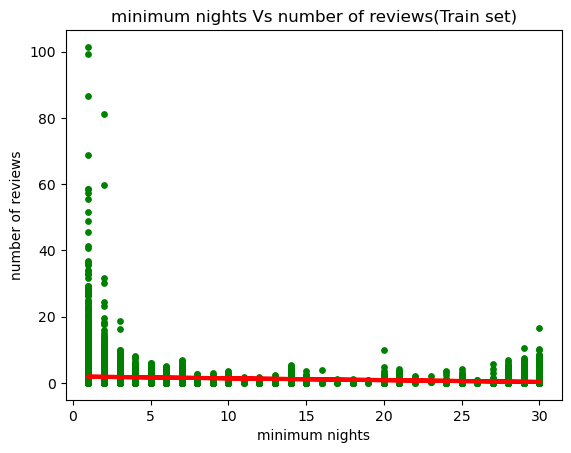

In [27]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('minimum nights Vs number of reviews(Train set)')
plot_test.xlabel('minimum nights')
plot_test.ylabel('number of reviews')
plot_test.show()

The training data set doesn't align well with the prediction line, indicating that the model isn't overfitting, but also suggesting its predictions aren't very reliable. Given the poor performance depicted by the R2 and MSE values, the model clearly needs refinement and iteration.

### Conclusion: 

> The analysis reveals a negative correlation between the minimum nights required for a listing and the number of reviews it receives, as suggested by the negative slope. However, our Root Square Error (RE) and Mean Squared Error (MSE) values imply that there are numerous other variables that impact the frequency of reviews, not solely the minimum night requirement.

>Factors such as location, amenities, pricing, and overall listing quality may also influence the number of reviews a listing receives, regardless of the minimum nights requirement. The low R2 score suggests that the minimum nights requirement accounts for only a small portion of the variability in monthly reviews, indicating that other unconsidered factors play a significant role in review frequency.

>This could potentially lead to the presence of confounding variables or omitted variable bias in the analysis, implying that other factors not included in the model could be influencing the relationship between minimum nights and monthly reviews.

>Furthermore, the assumption of linearity may not be valid in this case, as the relationship between variables may follow a non-linear or decay curve pattern, which is not captured by the linear regression model. Additionally, outliers or influential data points might disproportionately impact the relationship between the minimum nights requirement and the frequency of monthly reviews. These outliers may represent unique or extreme instances that do not reflect the overall data trend. Despite these challenges, efforts have been made to manage outliers without compromising the accuracy of the data.